f:\python\env\py27\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: ensure_index is deprecated. Use create_index instead.


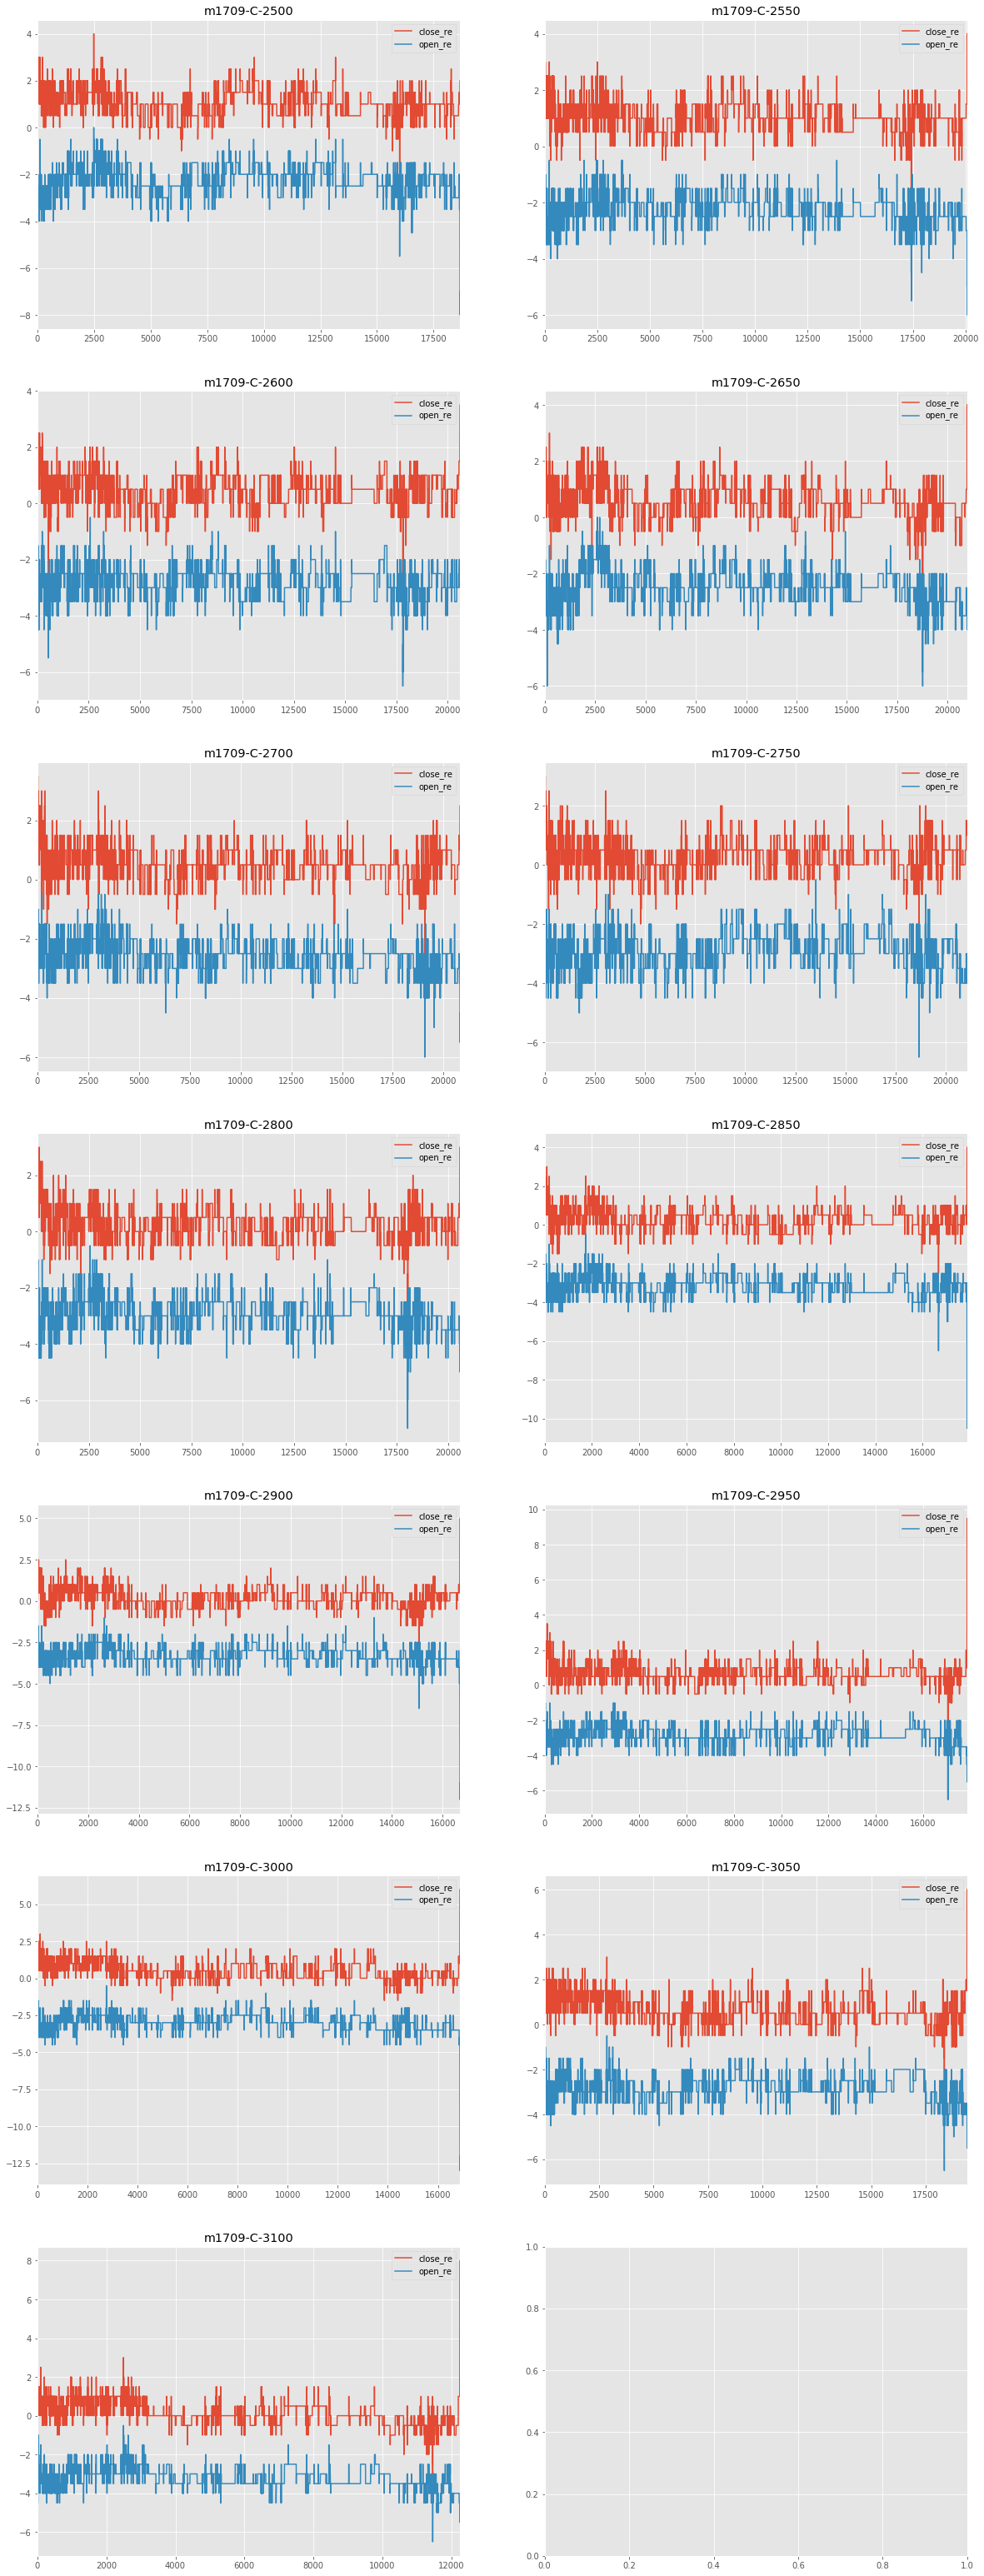

In [1]:
# encoding:utf-8
# 对套利组合的名称列表进行遍历
# 得到所有“组合”在某个时间段的tick数据以及space情况
import numpy as np
import pandas as pd
import pymongo

import math
import datetime
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
###################参数部分################
datetime1 = datetime.datetime(2017, 6, 5, 9, 0, 0)
datetime2 = datetime.datetime(2017, 6, 5, 15, 0, 0)
query_ = {
    '$and':[#{'askPrice1':{'$lt':9999, '$gt':0}},{'bidPrice1':{'$lt':9999, '$gt':0}},\
           #{'askVolume1':{'$gt':0, '$lt':50}},{'bidVolume1':{'$gt':0, '$lt':50}},\
            
            {'askPrice1_c':{'$lt':9999, '$gt':0}},{'bidPrice1_c':{'$lt':9999, '$gt':0}},\
           {'askVolume1_c':{'$gt':0, '$lt':50}},{'bidVolume1_c':{'$gt':0, '$lt':50}},\
            
            {'askPrice1_p':{'$lt':9999, '$gt':0}},{'bidPrice1_p':{'$lt':9999, '$gt':0}},\
           {'askVolume1_p':{'$gt':0, '$lt':50}},{'bidVolume1_p':{'$gt':0, '$lt':50}},\
            
        {'close_re':{'$lt':15, '$gt':-15}, 'open_re':{'$lt':15, '$gt':-15}, 'open_ca':{'$lt':15, '$gt':-35}, 'open_ca':{'$lt':15, '$gt':-35}},\
        
           {'datetime':{'$gt':datetime1, '$lt':datetime2}}]
}
all_symbols = ["m1708-C-2600", "m1708-C-2650", "m1708-C-2700", "m1708-C-2750", "m1708-C-2800", "m1708-C-2850", "m1708-C-2900", "m1707-C-2500", "m1707-P-2500", "m1708-C-2500", "m1708-P-2500", "m1712-C-2550", "m1712-P-2550", "m1707-C-3150", "m1707-P-3150", "m1707-C-3100", "m1707-P-3100", "m1711-C-3100", "m1711-P-3100", "m1709-C-3100", "m1709-P-3100", "m1801", "m1709-P-2600", "m1708-C-2950", "m1708-C-3000", "m1708-C-3050", "m1708-P-2600", "m1708-P-2650", "m1708-P-2700", "m1708-P-2750", "m1708-P-2800", "m1708-P-2850", "m1708-P-2900", "m1708-P-2950", "m1708-P-3000", "m1708-P-3050", "m1709-C-2550", "m1709-C-2600", "m1709-C-2650", "m1709-C-2700", "m1709-C-2750", "m1709-C-2800", "m1709-C-2850", "m1709-C-2900", "m1709-C-2950", "m1709-C-3000", "m1709-P-2550", "m1709-P-2650", "m1711-P-2900", "m1709-P-2700", "m1709-P-2750", "m1709-P-2800", "m1709-P-2850", "m1709-P-2900", "m1709-P-2950", "m1709-P-3000", "m1711-C-2600", "m1711-C-2650", "m1711-C-2700", "m1711-C-2750", "m1711-C-2800", "m1711-C-2850", "m1711-C-2900", "m1711-C-2950", "m1711-C-3000", "m1711-C-3050", "m1711-P-2600", "m1711-P-2650", "m1711-P-2700", "m1711-P-2750", "m1711-P-2800", "m1711-P-2850", "m1711-P-2950", "m1711-P-3000", "m1711-P-3050", "m1712-C-2650", "m1803-P-2800", "m1803-P-2850", "m1803-P-2900", "m1803-P-2950", "m1803-P-3000", "m1803-P-3050", "m1803-P-3100", "m1712-C-2700", "m1712-C-2750", "m1712-C-2800", "m1712-C-2850", "m1712-C-2900", "m1712-C-2950", "m1712-C-3000", "m1712-C-3050", "m1712-C-3100", "m1712-C-3150", "m1712-P-2650", "m1712-P-2700", "m1712-P-2750", "m1712-P-2800", "m1711", "m1712-P-2850", "m1712-P-2900", "m1712-P-2950", "m1712-P-3000", "m1712-P-3050", "m1712-P-3100", "m1712-P-3150", "m1801-C-2600", "m1801-C-2650", "m1801-C-2700", "m1801-C-2750", "m1801-C-2800", "m1801-C-2850", "m1801-C-2900", "m1801-C-2950", "m1801-C-3000", "m1801-C-3050", "m1801-P-2600", "m1801-P-2650", "m1801-P-2700", "m1801-P-2750", "m1801-P-2800", "m1801-P-2850", "m1801-P-2900", "m1801-P-2950", "m1805", "m1712", "m1801-P-3000", "m1801-P-3050", "m1803-C-2650", "m1803-C-2700", "m1803-C-2750", "m1803-C-2800", "m1803-C-2850", "m1803-C-2900", "m1803-C-2950", "m1803-C-3000", "m1803-C-3050", "m1803-C-3100", "m1803-P-2650", "m1803-P-2700", "m1803-P-2750", "m1707-C-2600", "m1707-C-2650", "m1707-C-2700", "m1707-C-2750", "m1707-C-2800", "m1707-C-2850", "m1707-C-2900", "m1707-C-2950", "m1707-C-3000", "m1707-C-3050", "m1707-P-2600", "m1707-P-2650", "m1707-P-2700", "m1707-P-2750", "m1707-P-2800", "m1707-P-2850", "m1707-P-2900", "m1707-P-2950", "m1707-P-3000", "m1707-P-3050", "m1803", "m1708-C-3100", "m1708-P-3100", "m1709-C-3050", "m1709-P-3050", "m1801-C-3100", "m1801-P-3100", "m1707-C-2550", "m1707-P-2550", "m1712-C-2600", "m1712-P-2600", "m1803-C-2600", "m1803-P-2600", "m1709", "m1708-C-2550", "m1708-P-2550", "m1709-C-2500", "m1709-P-2500", "m1711-C-2550", "m1711-P-2550", "m1801-C-2550", "m1801-P-2550", "m1803-C-2550", "m1803-P-2550", "m1707", "m1708"]

#这里可以只取9月份数据
all_symbols = [s for s in all_symbols if 'm1709-C' in s]
all_symbols.sort()

column_spread = ['true_spread', 'true_spread_c', 'true_spread_p']
column_re = ['close_re', 'open_re']
column_ca = ['close_ca', 'open_ca']

column_vol = ['askVolume1_c', 'askVolume1_p', 'bidVolume1_c', 'bidVolume1_p']
#连接数据库
mongo_client = pymongo.MongoClient('localhost', 27017)
#获取数据库
space_db = mongo_client['parity_space']

#图像大小是宽10，高8，共32幅
plt.figure(figsize=[20,8*7])
fig, axes = plt.subplots(nrows=7, ncols=2)

for row in range(16):
    for col in range(2):
        #获取表名称
        num = row*2+col
        if num>=13:
            continue
        single_symbol = all_symbols[num]
        #获取数据表和数据
        coll_name = 'Parity'+ single_symbol[0:5] + single_symbol[-4:] +'Strategy'
        collection = space_db[coll_name]
        #添加索引
        collection.ensure_index([("datetime", pymongo.ASCENDING)])
        result = collection.find(query_).sort([('datetime', pymongo.ASCENDING)])
        df = pd.DataFrame(list(result))
        if len(df.index.values)==0:
            continue
        df.loc[:,column_re].plot(title=single_symbol, ax=axes[row, col], legend=True, figsize=[20, 8*7])
        #df.loc[:,column_ca].plot.hist(title=single_symbol,ax=axes[row, col], figsize=[20, 8*7],stacked=True,bins=90,legend=True)
plt.show()